# Preliminaries

To change the number of threads, run the cell below and then change the notebook's kernel to the newly created one. The kernel might need to be refreshed before the new kernel comes up as an option.

In [1]:
# using IJulia
# installkernel("Julia 4 threads", env=Dict("JULIA_NUM_THREADS"=>"4"));
println("Number of threads = $(Threads.nthreads())")
println("Julia version = $(VERSION)")

Number of threads = 6
Julia version = 1.11.5


Upon running this notebook for the first time, the following cell must be evaluated.

In [2]:
# include("../dependencies.jl");

The underlying parameters used in this notebook can be changed in the "params.jl" file.

In [3]:
using HDF5, LaTeXStrings, Plots.PlotMeasures, Plots
include("params.jl");

# Compute inspiral

First do a short run to JIT compile the function then do full run.

In [4]:
emri.inspiral_type = "Fitted";
@time Chimera.compute_inspiral(emri; JIT = true);
@time Chimera.compute_inspiral(emri);

JIT compilation run complete.
 37.593877 seconds (50.22 M allocations: 2.566 GiB, 2.62% gc time, 113.64% compilation time: <1% of which was recompilation)
File created: ../Results/Data/EMRI_sol_a_0.98_p_7.0_e_0.6_θmin_0.571_q_1.0e-5_psi0_0.1_chi0_0.2_phi0_0.3_nHarm_2_fit_range_factor_0.5_fourier_Julia_fit_lmax_mass_4_lmax_current_3.h5
 21.849854 seconds (21.36 M allocations: 7.908 GiB, 8.01% gc time, 0.14% compilation time)


In [5]:
emri.inspiral_type = "Analytic";
@time Chimera.compute_inspiral(emri; JIT = true);
@time Chimera.compute_inspiral(emri);

JIT compilation run complete.
  5.078372 seconds (3.50 M allocations: 178.739 MiB, 0.35% gc time, 97.65% compilation time)
File created: ../Results/Data/EMRI_sol_a_0.98_p_7.0_e_0.6_θmin_0.571_q_1.0e-5_psi0_0.1_chi0_0.2_phi0_0.3_BL_time_lmax_mass_4_lmax_current_3.h5
  2.556981 seconds (1.45 M allocations: 63.937 MiB, 1.45% gc time, 0.79% compilation time)


# Plot constants of motion

We first load the data from the inspiral. (Note that the inspiral with the option inspiral_type = "Analytic" is done in Boyer-Lindquist time, so when loading the trajectory one should remove λ and dt_dλ from the function calls below.)

In [6]:
emri.inspiral_type = "Fitted";

# load trajectory
λ_fit, t_fit, r_fit, θ_fit, ϕ_fit = Chimera.load_trajectory(emri);

t_fit = t_fit * MtoSecs;

# load fluxes
t_Fluxes_fit, EE_fit, LL_fit, QQ_fit, CC_fit, pArray_fit, ecc_fit, θminArray_fit = Chimera.load_constants_of_motion(emri);
t_Fluxes_fit, Edot_fit, Ldot_fit, Qdot_fit, Cdot_fit = Chimera.load_fluxes(emri);

t_Fluxes_fit = t_Fluxes_fit * MtoSecs;

# compute iota
ι_fit = @. acos(LL_fit / sqrt(LL_fit^2 + CC_fit));

In [7]:
emri.inspiral_type = "Analytic";

# load trajectory
t_analytic, r_analytic, θ_analytic, ϕ_analytic = Chimera.load_trajectory(emri);

t_analytic = t_analytic * MtoSecs;

# load fluxes
t_Fluxes_analytic, EE_analytic, LL_analytic, QQ_analytic, CC_analytic, pArray_analytic, ecc_analytic, θminArray_analytic = Chimera.load_constants_of_motion(emri);
t_Fluxes_analytic, Edot_analytic, Ldot_analytic, Qdot_analytic, Cdot_analytic = Chimera.load_fluxes(emri);

t_Fluxes_analytic = t_Fluxes_analytic * MtoSecs;

# compute iota
ι_analytic = @. acos(LL_analytic / sqrt(LL_analytic^2 + CC_analytic));

In [8]:
col = :blue
ls = :solid
lw = 2.0

col_2 = :red
ls_2 = :dash

wave_im_ratio = 5   # width / height
wave_height = 300; wave_width = wave_height * wave_im_ratio
xtickfontsize=10; ytickfontsize=10; guidefontsize=15;
# margins
left_margin = 8mm; right_margin=8mm; top_margin=8mm; bottom_margin=8mm;

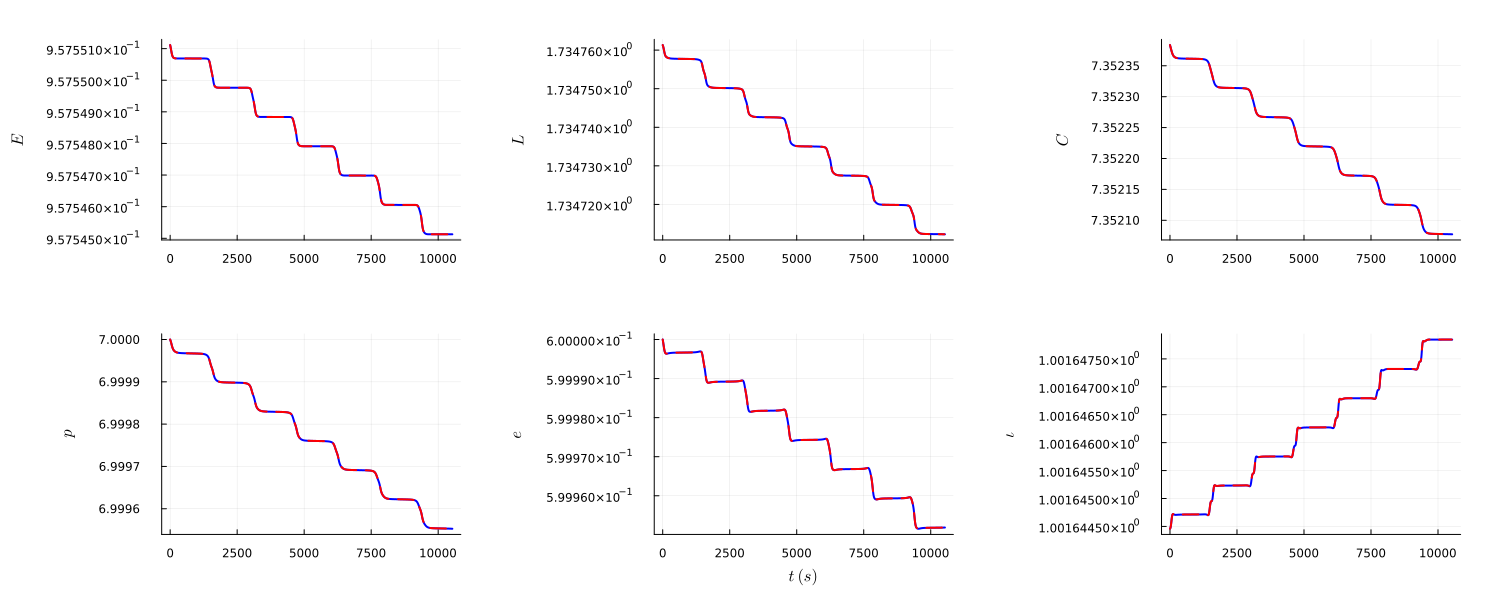

In [9]:
gr()
# plot BL results
plotE = Plots.plot(t_Fluxes_fit, EE_fit, ylabel=L"E", legend=:false,
    color=col, linestyle=ls, linewidth=lw,
    left_margin =  left_margin,
    right_margin =  right_margin,
    top_margin =  top_margin,
    bottom_margin =  bottom_margin)

plot!(plotE, t_Fluxes_analytic, EE_analytic, color=col_2, linestyle=ls_2, linewidth=lw)

plotL = Plots.plot(t_Fluxes_fit, LL_fit, ylabel=L"L", legend=:false,
    color=col, linestyle=ls, linewidth=lw,
    left_margin =  left_margin,
    right_margin =  right_margin,
    top_margin =  top_margin,
    bottom_margin =  bottom_margin)
plot!(plotL, t_Fluxes_analytic, LL_analytic, color=col_2, linestyle=ls_2, linewidth=lw)

plotC = Plots.plot(t_Fluxes_fit, CC_fit, ylabel=L"C", legend=:false,
    color=col, linestyle=ls, linewidth=lw,
    left_margin =  left_margin,
    right_margin =  right_margin,
    top_margin =  top_margin,
    bottom_margin =  bottom_margin)
plot!(plotC, t_Fluxes_analytic, CC_analytic, color=col_2, linestyle=ls_2, linewidth=lw)

plotP = Plots.plot(t_Fluxes_fit, pArray_fit, ylabel=L"p", legend=:false, 
    color=col, linestyle=ls, linewidth=lw,
    left_margin =  left_margin,
    right_margin =  right_margin,
    top_margin =  top_margin,
    bottom_margin =  bottom_margin)
plot!(plotP, t_Fluxes_analytic, pArray_analytic, color=col_2, linestyle=ls_2, linewidth=lw)

plotEcc = Plots.plot(t_Fluxes_fit, ecc_fit, ylabel=L"e", xlabel=L"t\ (s)", legend=:false,
    color=col, linestyle=ls, linewidth=lw,
    left_margin =  left_margin,
    right_margin =  right_margin,
    top_margin =  top_margin,
    bottom_margin =  bottom_margin)
plot!(plotEcc, t_Fluxes_analytic, ecc_analytic, color=col_2, linestyle=ls_2, linewidth=lw)

plotι = Plots.plot(t_Fluxes_fit, ι_fit, ylabel=L"\iota", legend=:false,
    color=col, linestyle=ls, linewidth=lw,
    left_margin =  left_margin,
    right_margin =  right_margin,
    top_margin =  top_margin,
    bottom_margin =  bottom_margin)
plot!(plotι, t_Fluxes_analytic, ι_analytic, color=col_2, linestyle=ls_2, linewidth=lw)

orbitalParamsPlot=plot(plotE, plotL, plotC, plotP, plotEcc, plotι, layout = @layout([[A B C]; [D E F]]), 
size=(1500, 600), dpi=100)
display("image/png", orbitalParamsPlot)

# Waveform computation

We now compute and plot the waveforms. The plus/cross polarization vectors in the source frame are given by $\mathbf{x}_w$, $\mathbf{y}_w$ as defined in Eq. 6 in [2104.04582](https://arxiv.org/pdf/2104.04582).

In [10]:
emri.inspiral_type = "Fitted";
@time Chimera.compute_waveform(emri);

File created: ../Results/Data/Waveform_a_0.98_p_7.0_e_0.6_θmin_0.571_q_1.0e-5_psi0_0.1_chi0_0.2_phi0_0.3_obsDist_1.0_ThetaS_10.0_PhiS_5.0_ThetaK_6.0_PhiK_8.0_nHarm_2_fit_range_factor_0.5_fourier_Julia_fit_lmax_mass_4_lmax_current_3.h5
  5.394431 seconds (10.40 M allocations: 290.594 MiB, 1.62% gc time, 113.69% compilation time)


In [11]:
emri.inspiral_type = "Analytic";
@time Chimera.compute_waveform(emri);

File created: ../Results/Data/Waveform_a_0.98_p_7.0_e_0.6_θmin_0.571_q_1.0e-5_psi0_0.1_chi0_0.2_phi0_0.3_obsDist_1.0_ThetaS_10.0_PhiS_5.0_ThetaK_6.0_PhiK_8.0_BL_time_lmax_mass_4_lmax_current_3.h5
  0.185287 seconds (6.61 M allocations: 106.067 MiB, 20.62% gc time, 74.17% compilation time)


In [12]:
emri.inspiral_type = "Fitted";
t_wf_fit, h_plus_fit, h_cross_fit = Chimera.load_waveform(emri);
t_wf_fit *= MtoSecs;

In [13]:
emri.inspiral_type = "Analytic";
t_wf_analytic, h_plus_analytic, h_cross_analytic = Chimera.load_waveform(emri);
t_wf_analytic *= MtoSecs;

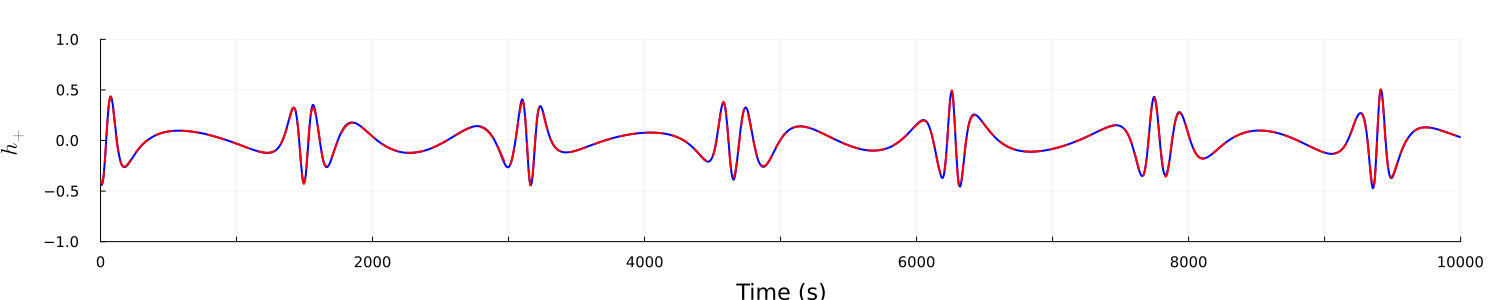

In [14]:
# NOTE: can multiply by "strain_to_SI" to convert waveform to SI units
gr()
p1 = plot(t_wf_fit, h_plus_fit, 
color=col,
linestyle=ls,
linewidth=lw,
xlims=(0, 10000),
legend =false,
xticks=(0:1000:10000, ["0", "", "2000", "", "4000", "", "6000", "", "8000", "", "10000"]),
xlabel = "Time (s)",
ylabel = L"h_{+}",
size=(wave_width, wave_height),
left_margin		=  left_margin,
right_margin	=  right_margin,
top_margin		=  top_margin,
bottom_margin	=  bottom_margin,
xtickfontsize = xtickfontsize,
ytickfontsize = ytickfontsize,
guidefontsize = guidefontsize,
ylims = (-1, 1),
label = "Fitted",
dpi=100)

plot!(p1, t_wf_analytic, h_plus_analytic, color=col_2, linestyle=ls_2, linewidth=lw, label="Analytic")

# plot!(p1, t_wf, h_plus, color=col_2, linestyle=ls_2, linewidth=lw_2, label="All Modes")

display("image/png", p1)